#### **Basic Imports**

In [1]:
from astropy.coordinates import SkyCoord, FK5, EarthLocation, AltAz, get_sun
from astropy.time import Time
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.filterwarnings('ignore', category=AstropyWarning)

## **Question 1**

RA and Dec that is published is usually for the epoch of 2000, called J2000. Do you think the RA and Dec would change today? Use astropy to find the RA and Dec of a radio source - Cygnus - A (RA 19h 59m 28.3566s  , Dec +40° 44′ 02.096″)

### **Solution**

Yes, RA and Dec coordinates change over time due to precession. This occurs because Earth's rotational axis wobbles slowly, gradually shifting the celestial coordinate system. While the change is small, it becomes noticeable today compared to the J2000 epoch.

In [2]:
cygnus_a_j2000 = SkyCoord(ra='19h59m28.3566s', dec='+40d44m02.096s', frame='fk5', equinox='J2000') # Cygnus A coordinates in J2026 frame
cygnus_a_today = cygnus_a_j2000.transform_to(FK5(equinox=Time.now()))

# Beautifying the output
cj2000_ra = cygnus_a_j2000.ra.to_string(unit=u.hour, sep=' ').split()
cj2000_dec = cygnus_a_j2000.dec.to_string(unit=u.deg, sep=' ', alwayssign=True).split()
ctoday_ra = cygnus_a_today.ra.to_string(unit=u.hour, precision=4, sep=' ').split()
ctoday_dec = cygnus_a_today.dec.to_string(unit=u.deg, precision=3, sep=' ', alwayssign=True).split()

print(f"J2000")
print(f"   RA:  {cj2000_ra[0]}h {cj2000_ra[1]}m {cj2000_ra[2]}s")
print(f"   Dec: {cj2000_dec[0]}° {cj2000_dec[1]}′ {cj2000_dec[2]}″")
print(f"\nToday")
print(f"   RA:  {ctoday_ra[0]}h {ctoday_ra[1]}m {ctoday_ra[2]}s")
print(f"   Dec: {ctoday_dec[0]}° {ctoday_dec[1]}′ {ctoday_dec[2]}″")

J2000
   RA:  19h 59m 28.3566s
   Dec: +40° 44′ 02.096″

Today
   RA:  19h 59m 28.4622s
   Dec: +40° 44′ 02.603″


## **Question 2**

What will be this source's azimuth and elevation when observing from IIT Kanpur?

### **Solution**

Coordinates were taken from "Google Maps" and points to IIT Kanpur's Main Gate

In [ ]:
cygnus_a = SkyCoord(ra='19h59m28.3566s', dec='+40d44m02.096s', frame='fk5', equinox='J2000')
iitk_loc = EarthLocation(lat=26.512325076791623*u.deg, lon=80.23075401145107*u.deg)     # Manually checked from Google Maps

curr_time = Time.now()  # Time in UTC
altaz_frame = AltAz(obstime=curr_time, location=iitk_loc)
cygnus_a_altaz = cygnus_a.transform_to(altaz_frame)

cygnus_a_alt = cygnus_a_altaz.alt.to_string(unit=u.deg, precision=3, sep=' ').split()
cygnus_a_az = cygnus_a_altaz.az.to_string(unit=u.deg, precision=3, sep=' ').split()

print(f"At IIT Kanpur, on {curr_time.iso}:")
print(f"Altitude:  {cygnus_a_alt[0]}° {cygnus_a_alt[1]}′ {cygnus_a_alt[2]}″")
print(f"Azimuth:   {cygnus_a_az[0]}° {cygnus_a_az[1]}′ {cygnus_a_az[2]}″")

At IIT Kanpur, on 2026-01-19 13:23:57.474:
Altitude:  9° 57′ 54.832″
Azimuth:   310° 49′ 45.817″


## **Question 3**

Show in a polar plot, how the azimuth and elevation of this source would change when observing at IITK.

### **Solution**

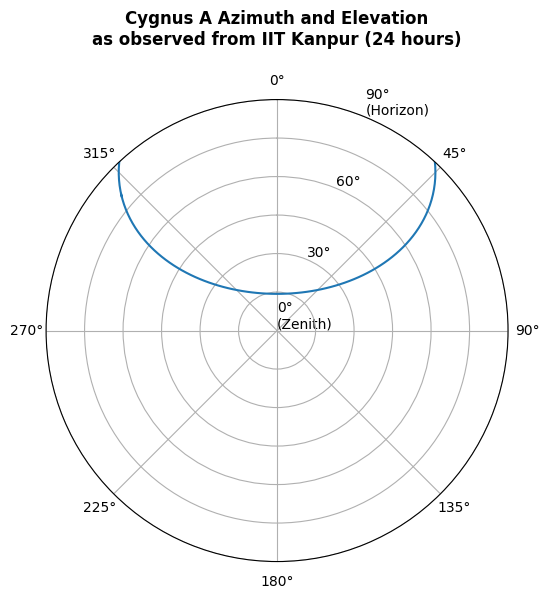

In [4]:
points = curr_time + np.linspace(0, 24, 144) * u.hour
cygnus_altaz = cygnus_a.transform_to(AltAz(obstime=points, location=iitk_loc))

# Convert for polar plot
az = cygnus_altaz.az.radian
r = 90 - cygnus_altaz.alt.degree   # Zenith angle

# Plot 
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(az, r)

# Formatting
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)  # Clockwise (East to right)
ax.set_ylim(0, 90)
ax.set_yticks(np.arange(0, 91, 15))
ax.set_yticklabels(['0°\n(Zenith)', '', '30°', '', '60°', '', '90°\n(Horizon)'])

ax.set_rlabel_position(22.5)
ax.set_title('Cygnus A Azimuth and Elevation\nas observed from IIT Kanpur (24 hours)\n', fontsize=12, fontweight='bold')

plt.show()

## **Question 4**

Plot how Sun's RA and Dec changes over a year. Compare this with respect to that of Cygnus over a year?

### **Solution**

**Linear Graph**

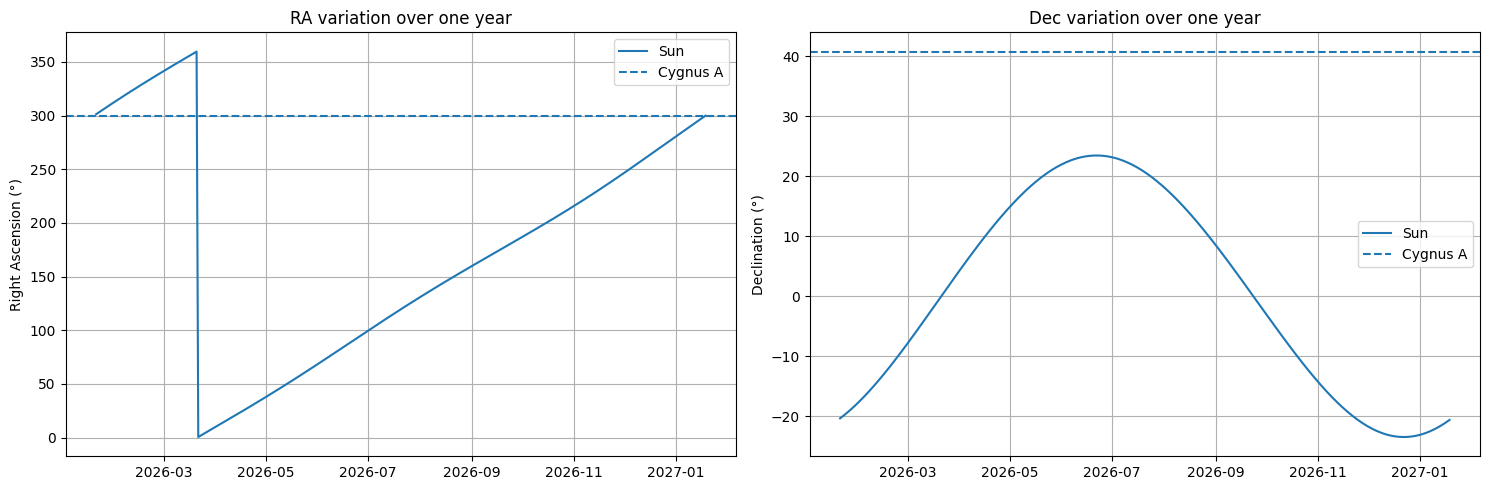

In [5]:
import erfa.core
warnings.filterwarnings("ignore", category=erfa.core.ErfaWarning)

# Sun coordinates over the year
times = curr_time + np.arange(0, 365) * u.day
sun_coords = get_sun(times)
sun_ra = sun_coords.ra.degree
sun_dec = sun_coords.dec.degree

cyg_ra = cygnus_a.ra.degree
cyg_dec = cygnus_a.dec.degree

# Plot
plt.figure(figsize=(15, 5))

# RA subplot
plt.subplot(1, 2, 1)
plt.plot(times.datetime, sun_ra, label='Sun')
plt.axhline(cyg_ra, linestyle='--', label='Cygnus A')
plt.ylabel('Right Ascension (°)')
plt.title('RA variation over one year')
plt.legend()
plt.grid(True)

# Dec subplot
plt.subplot(1, 2, 2)
plt.plot(times.datetime, sun_dec, label='Sun')
plt.axhline(cyg_dec, linestyle='--', label='Cygnus A')
plt.ylabel('Declination (°)')
plt.title('Dec variation over one year')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Polar Graph**

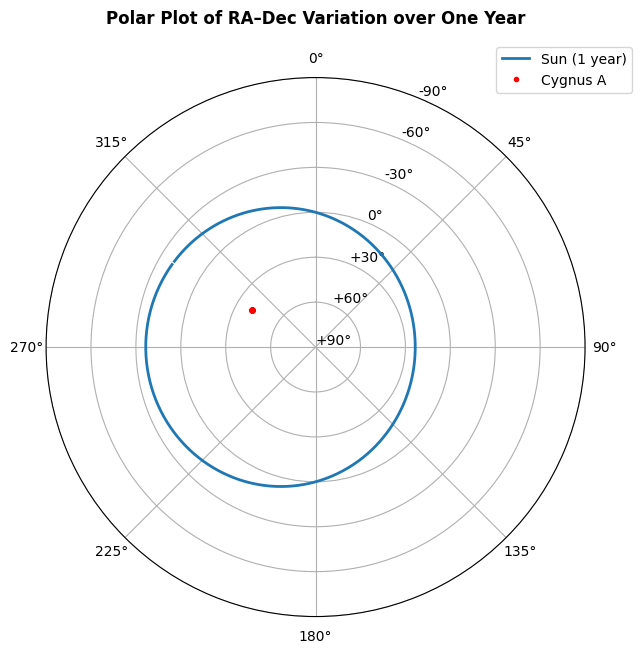

In [6]:
sun_theta = sun_coords.ra.radian
sun_r = 90 - sun_coords.dec.degree

cyg_theta = np.full_like(sun_theta, cygnus_a.ra.radian)
cyg_r = np.full_like(sun_r, 90 - cygnus_a.dec.degree)


# Plot
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

ax.plot(sun_theta, sun_r, linewidth=2, label='Sun (1 year)')
ax.plot(cyg_theta, cyg_r, '.', color='red', linewidth=3, label='Cygnus A')
ax.scatter(cyg_theta[0], cyg_r[0], color='red', s=16, zorder=5)


# Formatting
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_ylim(0, 180)

ax.set_yticks([0, 30, 60, 90, 120, 150, 180])
ax.set_yticklabels(['+90°', '+60°', '+30°', '0°', '-30°', '-60°', '-90°'])

ax.set_title(
    'Polar Plot of RA–Dec Variation over One Year',
    fontsize=12,
    fontweight='bold',
    pad=20
)

ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.07))

plt.show()
